 <img src="header.png">


### Assignment #4
### deadline 1402/09/30

In [1]:
Student_name = 'Ghadir Rahmaninia'
Student_ID = 40106324

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import logging
logging.getLogger('tensorflow').disabled = True

## Problem Statement
Recall the flutter phenomenon in composite wings that was described in Assignment #2. There was a graph that shows the flutter speed in terms of fiber angle.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from utils import plot_data


Text(-50, 35.5, 'Unsafe region')

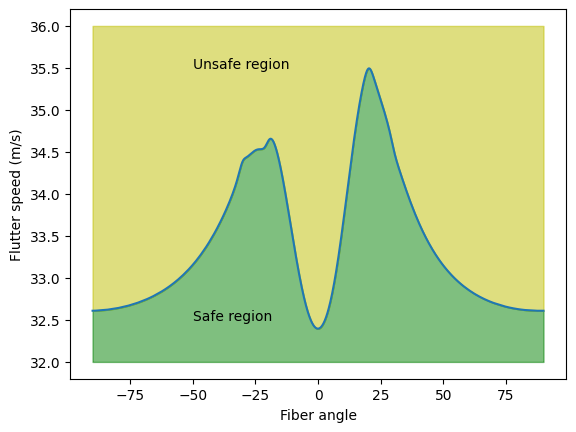

In [4]:
x,y = np.loadtxt('flutter.csv', delimiter= ',',unpack=True, skiprows=1)
plt.plot(x,y)
plt.xlabel('Fiber angle')
plt.ylabel('Flutter speed (m/s)')
plt.fill_between(x,y,y2=32,color='g',alpha=0.5)
plt.fill_between(x,y,y2=36,color='y',alpha=0.5)
plt.text(-50,32.5,'Safe region')
plt.text(-50,35.5,'Unsafe region')


The flutter speed curve in the above graph has devided the region in two safe and unsafe regions. Hence, we can assumed this problem as a binary classification, and the flutter speed curve can be regarded as its decision boundary.

### load data
Several data points has been randomly generated in the both safe and unsafe regions. They have been loaded as follows:

In [5]:
fiber_angle, speed, label = np.loadtxt('input.csv',unpack =True, skiprows=1,delimiter=',')
X_train = np.c_[fiber_angle,speed]
y_train = label

It should be noted that the input features are fiber angle of the composite wing and cruise speed of the aircraft. The training data of this binary classification problem has been depicted in the following figure:

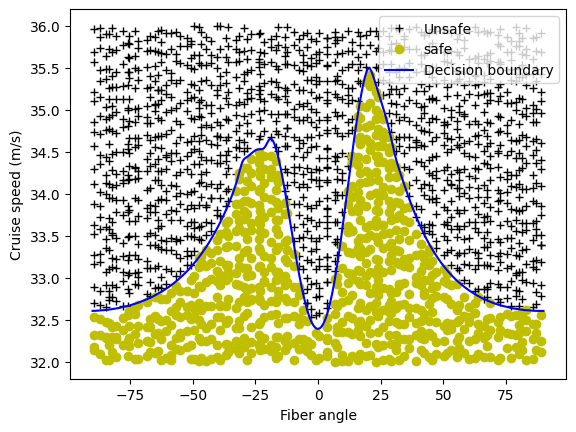

In [6]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Unsafe", neg_label="safe")
plt.plot(x,y,color='b',label='Decision boundary')
# Set the y-axis label
plt.xlabel('Fiber angle') 
# Set the x-axis label
plt.ylabel('Cruise speed (m/s)') 
plt.legend(loc="upper right")


## Goal
The main goal of this assigmnet is to determine the instability flutter boundary of the composite wing using machine learning tools. As a first attempt, a Polynomial Logistic Regression is adopted. The decision boundary of this model is considered as follows:

$$z = w_1 \theta + w_2 \theta^2 + ... + w_n\theta^n+w_{n+1}V+b $$

in which $\theta = $ fiber angle, $V =$ cruise speed, and $n =$ degree of the polynomial. For implimention this model the following codes has been used:


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
# ColumnTransformer is used for constructing the aboved-mentioned polynomial
degree = 25
tran =  ColumnTransformer([('poly', PolynomialFeatures(degree = degree, include_bias=False),[0])],
                          remainder = 'passthrough' )

classifier = make_pipeline(tran,StandardScaler(),LogisticRegression(C=1e6))
classifier.fit(X_train,y_train[:])
classifier.score(X_train,y_train[:])

c:\Users\Ghadir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8938095238095238

It should be noted that the parameter C of the logistic regression model controls the regularization of the model. It is the inverse of the regularization strength and smaller values specify stronger regularization. In case of separable data it should be a very high value because it forces the model not misclassify.

### Decision boundary
To evaluate the performance of the trained model, its decision boundary is as follows:  

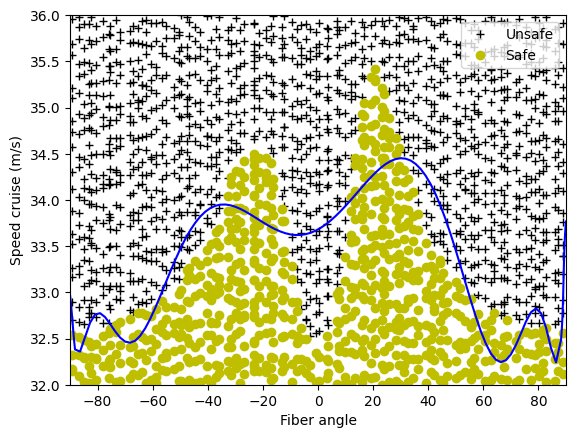

In [8]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Unsafe", neg_label="Safe")

# Set the y-axis label
plt.ylabel('Speed cruise (m/s)') 
# Set the x-axis label
plt.xlabel('Fiber angle') 
plt.legend(loc="upper right")



        
u = np.linspace(-90, 90, 100)
v = np.linspace(32, 36, 100)
uu, vv = np.meshgrid(u,v)

grid = np.stack((uu,vv))
grid = grid.T.reshape(-1,2)
outs = classifier.predict_proba(grid)
z = outs.T[0].reshape(uu.shape[0],uu.shape[1])
    
# important to transpose z before calling contour       
z = z.T

# Plot z = 0.5
plt.contour(u,v,z, levels = [0.5], colors="b")


It is clear that the model has been poorly trained. You can test with different polynomial degrees. 

## Assignment Tasks
The student should use TensorFlow to build neural network for this binary classification.
* Try to find the optimum architecture of the neural network for this problem by comparing performance of the different neural networks on the training data. 
* The performance of the neural networks can be compared based on the number of the misclassified cases.
* The dicision boundary should be plotted the same as the above plot.



X_train Max, Min pre normalization: 88.87, -89.37
X_train Max, Min post normalization: 1.71, -1.72
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
6

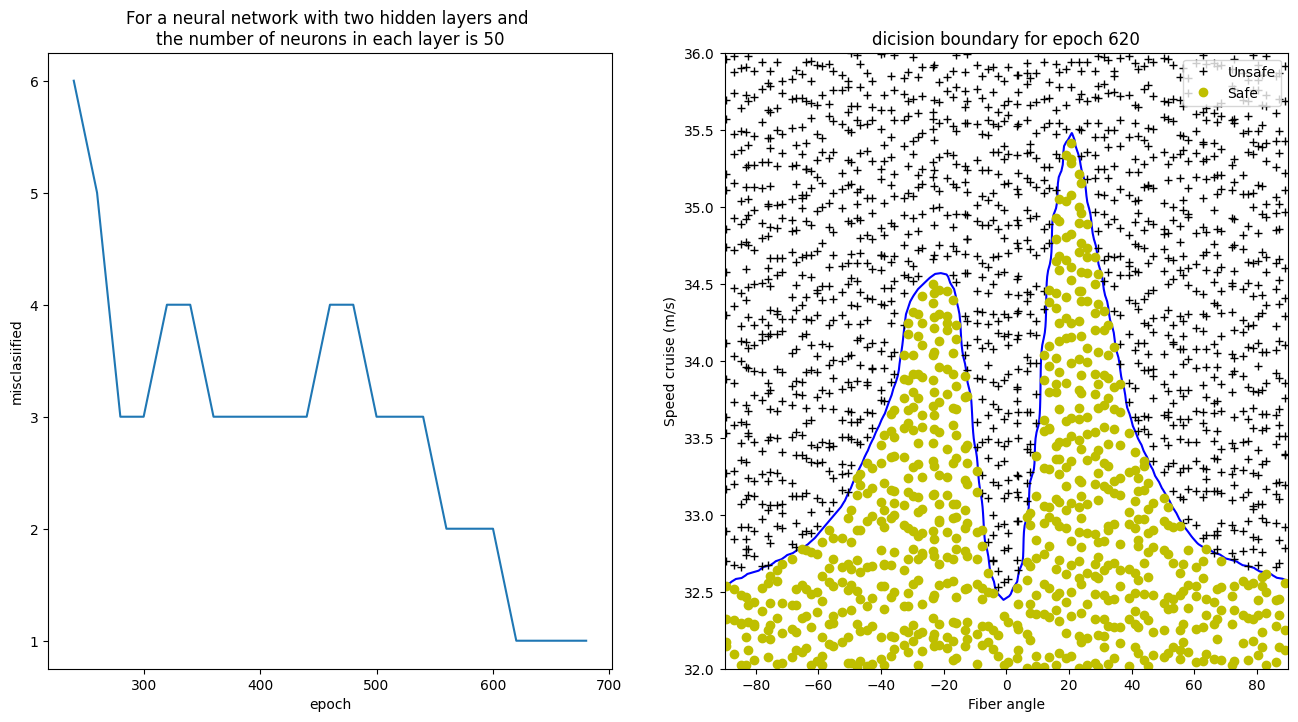

Run Time : 6.073946968714396 min


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, binary_crossentropy
from tensorflow.python.keras import regularizers
from sklearn.metrics import mean_squared_error, zero_one_loss
from colorama import Fore

import time
start = time.time()

print(f"X_train Max, Min pre normalization: {np.max(X_train[:,0]):0.2f}, {np.min(X_train[:,0]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_norm = norm_l(X_train)
print(f"X_train Max, Min post normalization: {np.max(X_norm[:,0]):0.2f}, {np.min(X_norm[:,0]):0.2f}")


number_unit = 50
epoch = np.arange(240, 700, 20)
misclasiifieds = np.zeros(epoch.size)


def neural_network(i) :
    tf.keras.utils.set_random_seed(0)
    
    model = Sequential([
            tf.keras.Input(shape=(2,)),
            Dense(units=number_unit, activation='relu'),
            Dense(units=number_unit, activation='relu'),
            Dense(units= 1, activation='sigmoid')])

    model.compile(
    #               loss = MeanSquaredError(),
                  loss = binary_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

    model.fit(X_norm, y_train, epochs=epoch[i], batch_size=100, verbose=0)

    y_pred = model.predict(X_norm)
    y_pred = (y_pred > 0.5).astype(int)
    misclasiified = zero_one_loss(y_train, y_pred, normalize=False)
    
    
    return [misclasiified, model]

for i in range(epoch.size):
    misclasiifieds[i] = neural_network(i)[0]

u = np.linspace(-90, 90, 100)
v = np.linspace(32, 36, 100)
uu, vv = np.meshgrid(u,v)

grid = np.stack((uu,vv))
grid = grid.T.reshape(-1,2)
grid = norm_l(grid)
j = np.unravel_index(np.argmin(misclasiifieds), misclasiifieds.shape)[0]
model = neural_network(j)[1]
outs = model.predict(grid)
z = outs.T[0].reshape(uu.shape[0],uu.shape[1])
# important to transpose z before calling contour       
z = z.T

fig = plt.figure(figsize=(16, 8))

fig1 = fig.add_subplot(1, 2, 1)
fig1.plot(epoch, misclasiifieds)
fig1.set_xlabel('epoch')
fig1.set_ylabel('misclasiified')
fig1.set_title(f'For a neural network with two hidden layers and \nthe number of neurons in each layer is {number_unit}')


fig2 = fig.add_subplot(1, 2, 2)

# Plot z = 0.5
fig2.contour(u,v,z, levels = [0.5], colors="b")

plot_data(X_train, y_train[:], pos_label="Unsafe", neg_label="Safe")
fig2.set_xlabel('Fiber angle')
fig2.set_ylabel('Speed cruise (m/s)')
fig2.set_title(f'dicision boundary for epoch {epoch[j]}')
plt.legend(loc="upper right")
plt.show()

print(f"Run Time : {(time.time() - start)/60} min")


313/313 [==============================] - 0s 682us/step


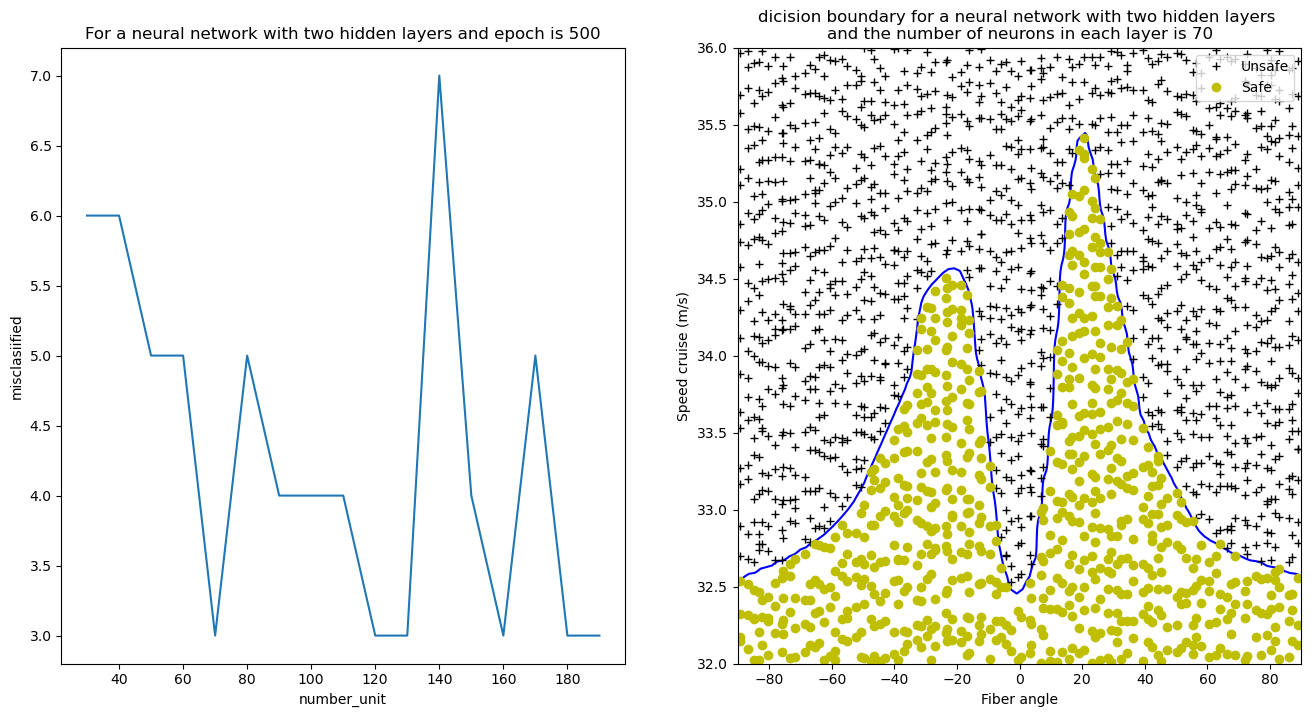

Run Time : 8.216189058621724 min


In [ ]:
epoch = 500
number_unit = np.arange(30, 200, 10)
misclasiifieds = np.zeros(number_unit.size)


def neural_network(i) :
    tf.keras.utils.set_random_seed(0)
    
    model = Sequential([
            tf.keras.Input(shape=(2,)),
            Dense(units=number_unit[i], activation='relu'),
            Dense(units=number_unit[i], activation='relu'),
            Dense(units= 1, activation='sigmoid')])

    model.compile(
    #               loss = MeanSquaredError(),
                  loss = binary_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

    model.fit(X_norm, y_train, epochs=epoch, batch_size=100, verbose=0)

    y_pred = model.predict(X_norm)
    y_pred = (y_pred > 0.5).astype(int)
    misclasiified = zero_one_loss(y_train, y_pred, normalize=False)
    
    
    return [misclasiified, model]

for i in range(number_unit.size):
    misclasiifieds[i] = neural_network(i)[0]

u = np.linspace(-90, 90, 100)
v = np.linspace(32, 36, 100)
uu, vv = np.meshgrid(u,v)

grid = np.stack((uu,vv))
grid = grid.T.reshape(-1,2)
grid = norm_l(grid)

j = np.unravel_index(np.argmin(misclasiifieds), misclasiifieds.shape)[0]
model = neural_network(j)[1]
outs = model.predict(grid)

z = outs.T[0].reshape(uu.shape[0],uu.shape[1])
# important to transpose z before calling contour       
z = z.T

fig = plt.figure(figsize=(16, 8))

fig1 = fig.add_subplot(1, 2, 1)
fig1.plot(number_unit, misclasiifieds)
fig1.set_xlabel('number_unit')
fig1.set_ylabel('misclasiified')
fig1.set_title(f'For a neural network with two hidden layers and epoch is {epoch}')

# print(f"number of misclasiified sample : {misclasiified}")



fig2 = fig.add_subplot(1, 2, 2)

# Plot z = 0.5
fig2.contour(u,v,z, levels = [0.5], colors="b")

plot_data(X_train, y_train[:], pos_label="Unsafe", neg_label="Safe")
fig2.set_xlabel('Fiber angle')
fig2.set_ylabel('Speed cruise (m/s)')
fig2.set_title(f'dicision boundary for a neural network with two hidden layers \nand the number of neurons in each layer is {number_unit[j]}')
plt.legend(loc="upper right")
plt.show()

print(f"Run Time : {(time.time() - start)/60} min")
